<a href="https://colab.research.google.com/github/MazenMarei25/Machine-Learning-Practice-/blob/main/Classification/machine_failure_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umerrtx/machine-failure-prediction-using-sensor-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'machine-failure-prediction-using-sensor-data' dataset.
Path to dataset files: /kaggle/input/machine-failure-prediction-using-sensor-data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("/kaggle/input/machine-failure-prediction-using-sensor-data/data.csv")

x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42
)


In [ ]:
print(x_train)
print(y_train)

print(x_test)
print(y_test)

[[ 22   3   7 ...  28   4  14]
 [  0   6   4 ...  91   1   5]
 [  0   6   5 ...  64   2  15]
 ...
 [ 23   5   6 ...  49   6  23]
 [110   7   4 ...  76   4  17]
 [ 84   7   4 ...  67   2   7]]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0

In [ ]:
print(x_train[0])

[22  3  7  1  6  5 28  4 14]


In [ ]:
# standarize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:,:])
x_test[:,:] = sc.transform(x_test[:,:])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#,"minkowski"
classifier = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='manhattan', metric_params=None, n_jobs=None)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred,labels=classifier.classes_)
ac = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Confusion Matrix:    {cm}")
print(f"Accuracy: {ac}")
print("")
print("Classification report")
print("--------------------")
print( report)

Confusion Matrix:    [[87 15]
 [17 70]]
Accuracy: 0.8306878306878307

Classification report
--------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       102
           1       0.82      0.80      0.81        87

    accuracy                           0.83       189
   macro avg       0.83      0.83      0.83       189
weighted avg       0.83      0.83      0.83       189



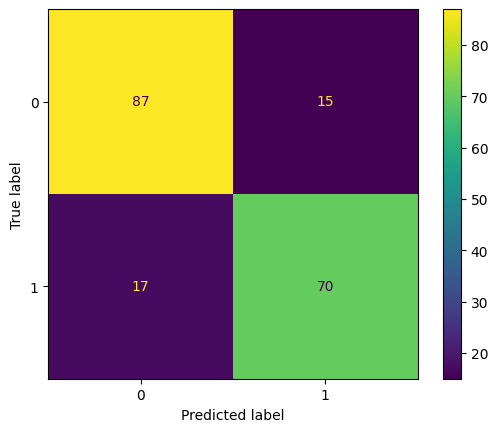

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()